## Neural Network for Classification problem

**Reference** Andrew Ng, Machine Learning, Coursera notes

###  Definitions

Suppose we have training set 
$$\{(\mathbf{x}^{(1)}, \mathbf{y}^{(1)}), (\mathbf{x}^{(2)}, \mathbf{y}^{(2)}), \ldots, (\mathbf{x}^{(m)}, \mathbf{y}^{(m)}) \}$$
where $L = \text{total no. of layers in network}$, $s_l = \text{no. of units in layer }l$ and $m$ = length of training set

that is, $s_1$ is number of units in layer 1 (example below is 3)

$j$ defined as node $j$

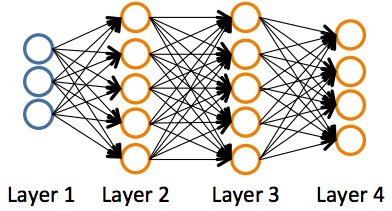

In [1]:
from IPython.display import Image
Image(filename='neural_nets.png')

### Output for classification

For binary class

$$y = 0 \text{ or } 1$$

For Multiclass classification

$$\mathbf{y} = \begin{bmatrix} 1\\0\\ \ldots \\0 \end{bmatrix}, \begin{bmatrix} 0 \\ 1 \\ \ldots \\0 \end{bmatrix}, \ldots$$

##  Cost function

**Logistic Regression with regularization**

$$J(\theta) = -\frac{1}{m} \left[ \sum_{i=1}^m y^{(i)} \log h_{\theta}(x^{(i)}) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)}) )) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_{j}^2 $$ 

**Neural network**

$$J(\theta) = -\frac{1}{m} \left[ \sum_{i=1}^m \sum_{k=1}^{K} y_{k}^{(i)} \log h_{\theta}(x^{(i)})_k + (1 - y_{k}^{(i)}) \log(1 - h_{\theta}(x^{(i)})_{k} )) \right] + \frac{\lambda}{2m} \sum_{l=1}^{L-1} \sum_{i=1}^{s_l} \sum_{j=1}^{s_l + 1} (\Theta_{ji}^{(l)})^2 $$ 

note that we exclude $\Theta_{i0}$ when we compute regularization terms

We want to minimize cost function $$\min_{\theta} J(\theta)$$

## Example of 4 layers

**Forward propagation**

\begin{align}
a^{(1)} &= x\\
z^{(2)} &= \Theta^{(1)}a^{(1)}\\
a^{(2)} &= g(z^{2}) \text{ (add $a_0^{(2)}$)}\\
z^{(3)} &= \Theta^{(2)} a^{(2)}\\
a^{(3)} &= g(z^{(3)})  \text{ (add $a_0^{(3)}$)}\\
z^{(4)} &= \Theta^{(3)} a^{(3)}\\
a^{(4)} &= h_{\Theta}(x) = g(z^{(4)})
\end{align}

$\delta_j^{(l)}$ is error of node $j$ in layer $l$

**Back propagation**
\begin{align}
\delta^{(4)} &= a^{(4)} - y\\
\delta^{(3)} &= (\Theta^{(3)})^\top \delta^{(4)}.* g'(z^{(3)}) \\
\delta^{(2)} &= (\Theta^{(2)})^\top \delta^{(3)}.* g'(z^{(2)})
\end{align}

where we can compute $g'(z^{(3)}) = a^{(3)}.*(1 - a^{(3)})$, $g'(z^{(2)}) = a^{(2)}.*(1 - a^{(2)})$

In [1]:
import numpy as np
from scipy.io import loadmat
mnist = loadmat('mnist_data.mat')
X = mnist['X']
y = mnist['y']
print "Size of X and y: ", X.shape, y.shape

Size of X and y:  (5000, 400) (5000, 1)


In [2]:
def sigmoid(z):
    g = 1.0/(1.0 + np.exp(-z))
    return g

def sigmoid_grad(z):
    g = sigmoid(z)*(1 - sigmoid(z))
    return g

## Back propagation algorithm

$\Delta_{ij}^{(l)} = 0$ for all $l, i, j$

for $i = 1 \text{ to } m:$ (every training examples)

- set $a^{(1)} = x^{(i)}$
- perform forward propagation to compute $a^{(l)}$
- compute $\delta^{(L)} = a^{(L)} - y^{(i)}$
- compute $\delta^{(L-1)}, \delta^{(L-2)}, \ldots, \delta^{(2)}$ (no $\delta^{(1)}$ because it's input layer)
- $\Delta_{ij}^{(l)} = \Delta_{ij}^{(l)} + a_j^{(l)} \delta_i^{(l+1)}$ or $\Delta^{(l)} = \Delta^{(l)} + \delta^{(l+1)} (a^{(l)})^\top$



$D_{ij}^{(l)} = \frac{1}{m} \Delta_{ij}^{(l)} + \lambda \Theta_{ij}^{(l)}$

$D_{ij}^{(l)} = \frac{1}{m} \Delta_{ij}^{(l)}$

where we can show that $\frac{\partial}{\partial \Theta_{ij}^{(l)}} J(\Theta) = D_{ij}^{(l)}$

**Example**

We use sample MNIST data which each has 20 $\times$ 20 pixels. Therefore, we need 400 input layer units. We use only 3 layers which input then map to 25 units in second layers. The output has 10 classes (number from 0 to 9) which means 10 units in third layers.

In [3]:
W = loadmat('weights.mat')
Theta1 = W['Theta1']
Theta2 = W['Theta2']
print Theta1.shape, Theta2.shape

(25, 401) (10, 26)


**Initialize neural network parameters**

One way to initialize $\Theta^{(i)}$ is to generate uniformly distributed values between $[ -\epsilon_{init}, \epsilon_{init}]$

In [4]:
def init_weight(L_in, L_out):
    """Randomly initialize the weights of a layer"""
    epsilon_init = 0.12
    W = np.random.rand(L_out, 1+L_in)*2*epsilon_init - epsilon_init
    return W

In [5]:
def compute_cost_grad(Theta1, Theta2, X, y, lm=1.0):
    """
    Compute cost and gradient of NN parameters for one iteration
    """
    # initialize few parameters
    n, m = X.shape
    J = 0
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)
    D1 = np.zeros(Theta1.shape)
    D2 = np.zeros(Theta2.shape)
    
    # forward propagation
    a1 = np.concatenate((np.ones((n,1)), X), axis=1)
    z2 = a1.dot(Theta1.T)
    a2 = sigmoid(z2)
    a2 = np.concatenate((np.ones((n,1)), a2), axis=1)
    z3 = a2.dot(Theta2.T)
    a3 = sigmoid(z3)
    h = a3
    
    # tranform y to Y, sparse format
    Y = np.zeros(h.shape)
    for i in range(n):
        Y[i, y[i]-1] = 1
    
    # compute cost
    J = -(1.0/n)*np.sum(np.sum(Y*np.log(h) + (1 - Y)*np.log(1 - h))) + \
         (lm/(2.0*n))*(np.sum(np.sum(Theta1[:,1::]**2)) + np.sum(np.sum(Theta2[:,1::]**2)))
    
    # back propagation
    delta3 = a3 - Y
    delta2 = delta3.dot(Theta2[:, 1::])*sigmoid_grad(z2)
    
    D1 = D1 + (delta2.T).dot(a1)
    Theta1_grad[:,0] = (1.0/m)*D1[:,0]
    Theta1_grad[:,1::] = (1.0/m)*D1[:,1::] + (lm/m)*Theta1[:,1::]
    
    D2 = D2 + (delta3.T).dot(a2)
    Theta2_grad[:,0] = (1.0/m)*D2[:,0]
    Theta2_grad[:,1::] = (1.0/m)*D2[:,1::] + (lm/m)*Theta2[:,1::]
    
    return J, Theta1_grad, Theta2_grad

In [6]:
J, Theta1_grad, Theta2_grad = compute_cost_grad(Theta1, Theta2, X, y)
print 'The cost function given Theta1 and Theta2 = ', J

The cost function given Theta1 and Theta2 =  0.383769859091


In [7]:
def predict(Theta1, Theta2, X):
    n, m = X.shape
    h1 = sigmoid(np.concatenate((np.ones((n,1)), X), axis=1).dot(Theta1.T))
    h2 = sigmoid(np.concatenate((np.ones((n,1)), h1), axis=1).dot(Theta2.T))
    p = np.atleast_2d(np.argmax(h2, axis=1) + 1).T
    return p

## Work flow for computing final $\Theta_1, \Theta_2$

To actually minimize the cost function, typically use `fmincon` or `fmincg` to pass cost and gradient to the function i.e.

`[nn_params, cost] = fminunc(compute_cost, initial_nn_params);`

However, we can try simple gradient descent to see the convolution of cost over iteration

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [9]:
# use simple gradient descent algorithm to get final Theta1 and Theta2
n_iter = 1000
epsilon = 0.3
Theta1 = init_weight(400, 25)
Theta2 = init_weight(25, 10)
J_all = []

for i in range(n_iter):
    J, Theta1_grad, Theta2_grad = compute_cost_grad(Theta1, Theta2, X, y)
    Theta1 = (Theta1 - epsilon*Theta1_grad)
    Theta2 = (Theta2 - epsilon*Theta2_grad)
    J_all.append(J)

In [10]:
# using Theta1, Theta2 from gradient descent
y_pred = predict(Theta1, Theta2, X)
print 'Training accuracy = ', np.mean(y == y_pred)*100

Training accuracy =  95.86


In [11]:
# converged Theta1, Theta2 from fmincg
W = loadmat('weights.mat')
Theta1 = W['Theta1']
Theta2 = W['Theta2']
y_pred = predict(Theta1, Theta2, X)
print 'Training accuracy = ', np.mean(y == y_pred)*100

Training accuracy =  97.52


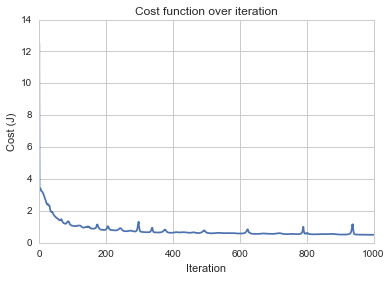

In [12]:
plt.plot(range(n_iter), J_all)
plt.xlabel('Iteration')
plt.ylabel('Cost (J)')
plt.title('Cost function over iteration')
plt.show()